In [1]:
import cv2
import numpy as np

video_path = r"C:\Users\GOD\Downloads\videoplayback (1).mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Read the first frame
ret, prev_frame = cap.read()

if not ret:
    print("Error: Could not read the video frame.")
    exit()

# Convert the first frame to grayscale
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

# Initialize a kernel for morphological operations (optional)
kernel = np.ones((5, 5), np.uint8)

# Get the frames per second (FPS) of the video
fps = cap.get(cv2.CAP_PROP_FPS)

while True:
    # Read the next frame
    ret, frame = cap.read()

    if not ret:
        break

    # Get the current timestamp of the frame (in seconds)
    frame_number = cap.get(cv2.CAP_PROP_POS_FRAMES)
    timestamp = frame_number / fps

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current frame and the previous frame
    diff = cv2.absdiff(prev_gray, gray)

    # Apply a threshold to the difference image to get the regions with significant changes
    _, thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

    # Optional: Apply morphological operations to remove noise and fill in the gaps
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Find contours of the detected motion
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw rectangles around the detected motion regions
    for contour in contours:
        if cv2.contourArea(contour) < 500:
            continue  # Ignore small movements
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # Add label "Motion" on top of the detected motion box
        cv2.putText(frame, "Motion", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Format and display the timestamp on the frame
    timestamp_text = f"Timestamp: {timestamp:.2f} seconds"
    cv2.putText(frame, timestamp_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Display the frame with motion detection and timestamp
    cv2.imshow("Motion Detection", frame)

    # Update the previous frame
    prev_gray = gray.copy()

    # Exit the loop if the user presses the 'q' key
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

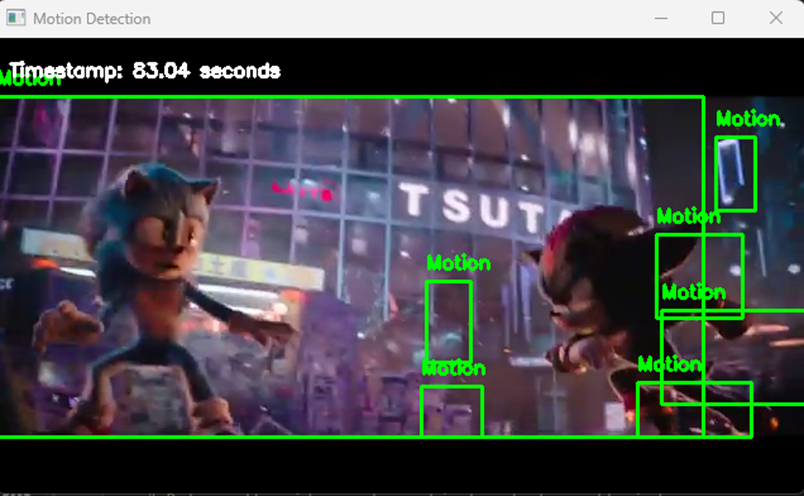

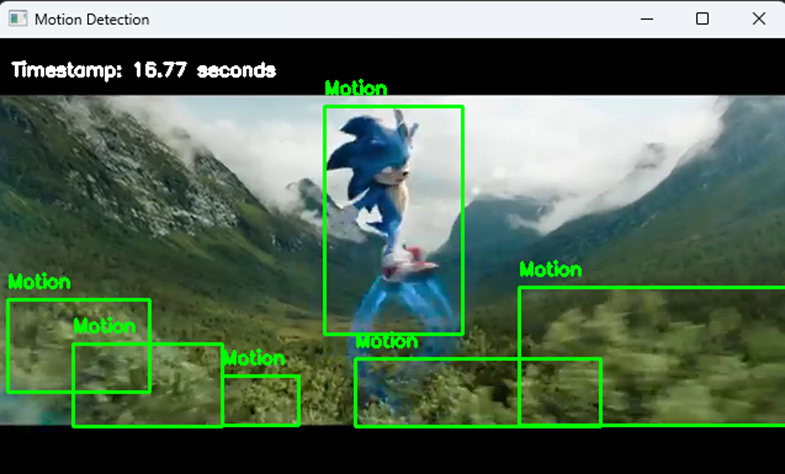

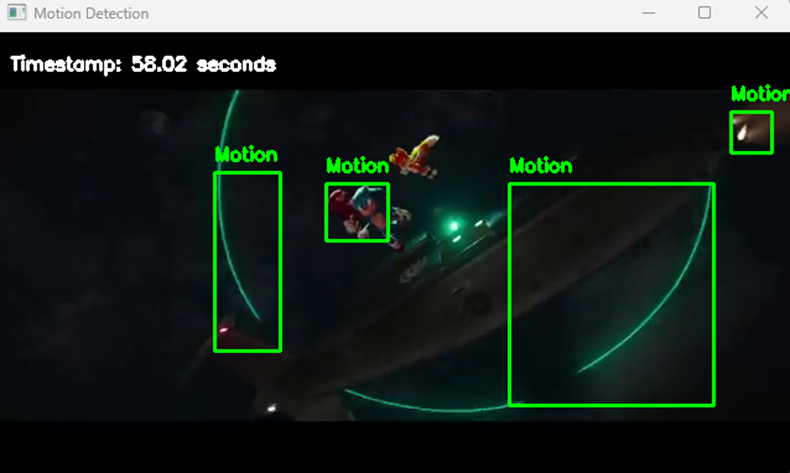